https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

In [2]:
temps_df = pd.read_csv("./data/temps.csv")
temps_df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Lidia con las variables categóricas del dataset

In [3]:
temps_df = pd.get_dummies(temps_df)

In [4]:
import seaborn as sns
%matplotlib inline

#sns.pairplot(temps_df.iloc[:,1:7])

In [5]:
#sns.pairplot(temps_df.iloc[:,6:11])

In [6]:
#Tenemos correlación lineal entre las variables y el target, así como multicolinealidad.
#Parece que un modelo de regresión lineal con una transformación de grado 2 podría funcionar bien. 
#Pero: ¿Qué tendríamos que hacer antes de implementar el modelo?
#-estandarizar
#-descartar variables por multicolinealidad

#Si implementaramos una regresión lineal, tendríamos que descartar variables por multicolinealidad.
#Para implementar un arbol de decisión no lo necesitamos.

### 3. Divide en train y test

In [7]:
X = temps_df.drop(columns=["actual"])
y = temps_df["actual"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

X.shape
X_train.shape
X_test.shape

(87, 17)

In [9]:
X_train.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'week_Fri', 'week_Mon',
       'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed'],
      dtype='object')

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train,y_train) 

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [11]:
import numpy as np

# 1. MAE de train

# Predecimos
predictions = tree_reg.predict(X_train)
#Calculamos el valor absoluto
errors = np.abs(y_train - predictions)
errors
#sacamos la media de los errores
#mean_errors = errors.mean()
print('Mean Absolute Error en train:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error en train: 0.0 degrees.


In [12]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, predictions)

#sklearn.metrics.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')[source]¶

0.0

In [13]:
# 2. MAE de test

# Predecimos
predictions = tree_reg.predict(X_test)
#Calculamos el valor absoluto
errors = np.abs(predictions - y_test)
#sacamos la media de los errores
#mean_errors = errors.mean()
print('Mean Absolute Error en test:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error en test: 5.55 degrees.


In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions)

5.551724137931035

### 6. Calcula su MAPE
Sin usar sklearn

In [15]:
# 1. MAPE test

mape = 100 * (errors / y_test)
print("MAPE", round(np.mean(mape), 2), "%")

MAPE 8.6 %


In [16]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, predictions)

0.08603369186160478

### 7. Representa el árbol de decision

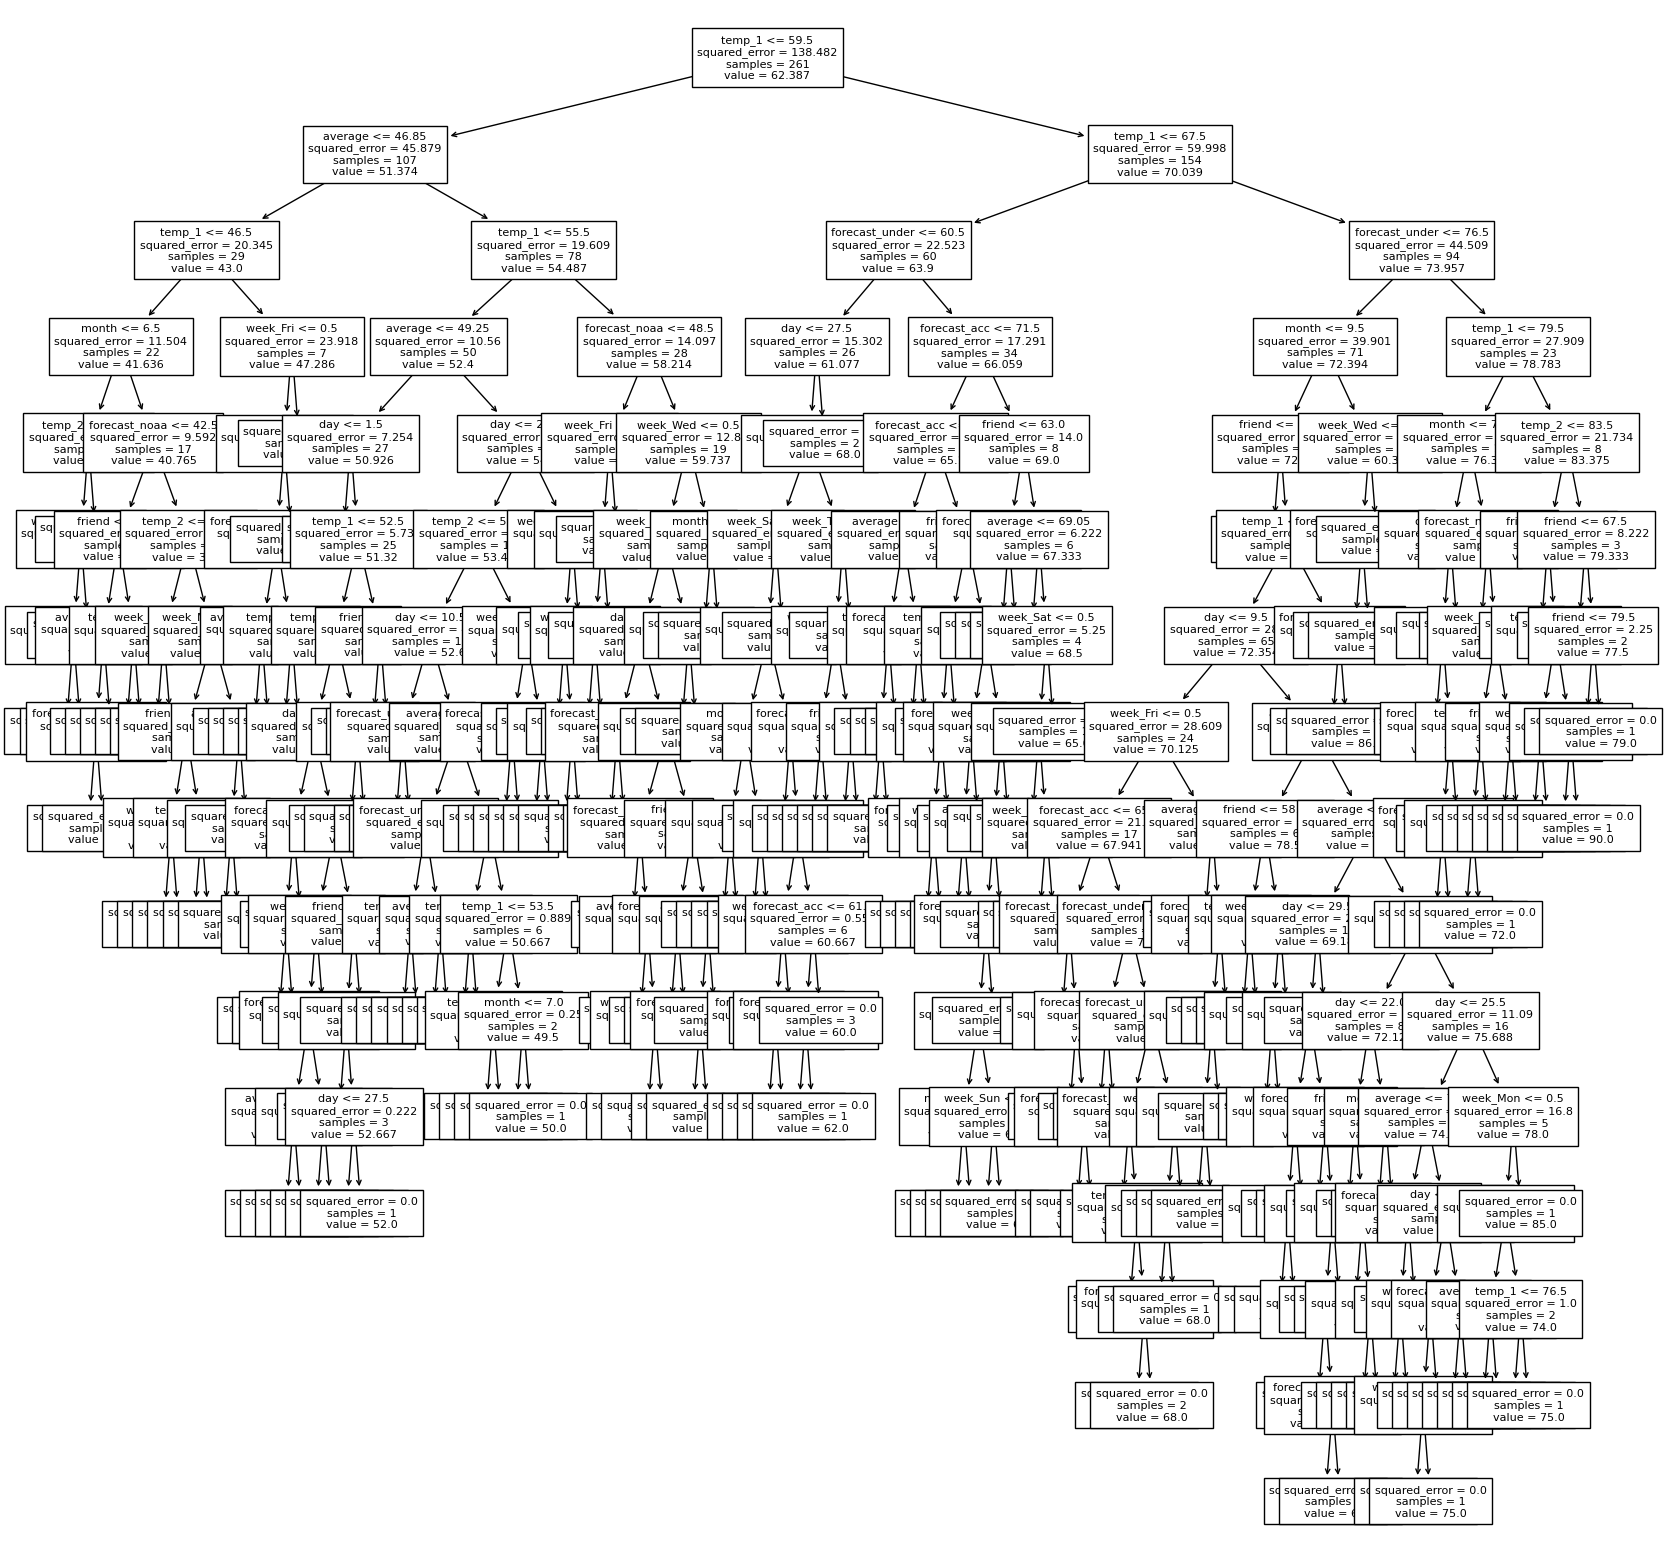

In [17]:
import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize=(20,20))

sklearn.tree.plot_tree(tree_reg,
               feature_names= X.columns,
               class_names="actual",
               fontsize = 8);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [18]:
tree_reg_lim = DecisionTreeRegressor(max_depth = 3, random_state = 42)#limitamos las bifurcaciones a 3 con el parámetro max depth

tree_reg_lim.fit(X_train,y_train) 

DecisionTreeRegressor(max_depth=3, random_state=42)

### 9. Vuelve a calcular su MAE

In [19]:
#1 MAE de train

predictions = tree_reg_lim.predict(X_train)
mean_absolute_error(y_train, predictions)

3.6640849571746177

In [20]:
# 2. MAE de test

# Predecimos
predictions = tree_reg_lim.predict(X_test)
#Calculamos el valor absoluto
errors = np.abs(predictions - y_test)
#sacamos la media de los errores
#mean_errors = errors.mean()
print('Mean Absolute Error en test:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error en test: 4.41 degrees.


In [21]:
predictions = tree_reg_lim.predict(X_test)

mean_absolute_error(y_test, predictions)

4.411345837873503

### 10. Vuelve a representar su árbol

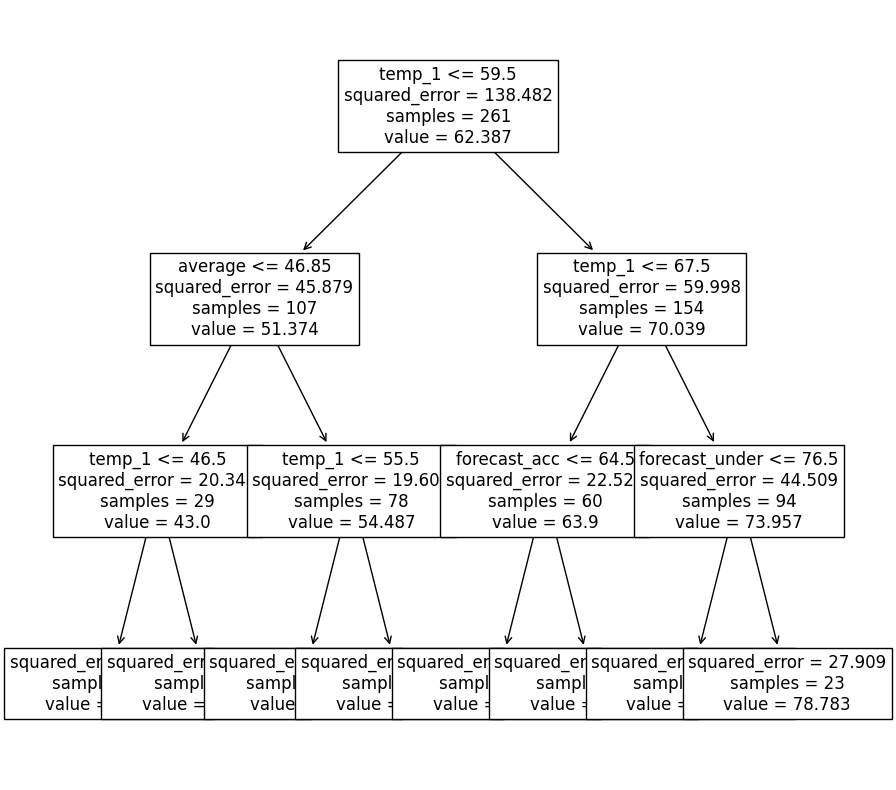

In [22]:
import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize=(10,10))

sklearn.tree.plot_tree(tree_reg_lim,
               feature_names= X.columns,
               class_names="actual",
               fontsize = 12);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [23]:
importance = tree_reg_lim.feature_importances_
importance

array([0.        , 0.        , 0.        , 0.        , 0.87263746,
       0.09194304, 0.        , 0.01205242, 0.02336708, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [24]:
importance_df = pd.DataFrame(importance, 
                             index = X.columns,
                            columns = ["Importances"]).sort_values('Importances', ascending=False)
importance_df 

,Importances
temp_1,0.872637
average,0.091943
forecast_under,0.023367
forecast_acc,0.012052
week_Fri,0.000000
week_Tues,0.000000
week_Thurs,0.000000
week_Sun,0.000000
week_Sat,0.000000
week_Mon,0.000000


# Feature importance y MAPE

Feature Importance en Árboles de Decisión

Feature importance es una medida que indica qué tan relevantes son las características (variables) de un dataset para predecir la variable objetivo en un modelo, como los Árboles de Decisión.

    Interpretación: En un árbol de decisión, las características más importantes son aquellas que más contribuyen a la reducción de la impureza (en modelos de clasificación) o a la varianza (en modelos de regresión). Cuando el árbol hace una división (split) en los nodos, se calcula qué tan buena es la característica para separar las clases o los valores. Cuanto mayor sea la mejora en la pureza/varianza, mayor será la importancia de esa característica.

    Cómo se calcula: Para cada nodo de decisión, el modelo calcula cuánto mejora la predicción si se utiliza una característica para dividir los datos. La importancia de una característica es la suma de todas las reducciones de impureza (o varianza) que esa característica ha generado en el árbol durante todo el proceso de construcción.

En Scikit-learn, la feature importance puede ser obtenida utilizando la propiedad feature_importances_ del modelo entrenado. La importancia de cada característica es un valor entre 0 y 1, donde el valor total de todas las características sumará 1.

In [25]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Supongamos que X_train es tu matriz de características y y_train es la variable objetivo
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un dataframe para visualizar las importancias
import numpy as np
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df)


           Feature  Importance
4           temp_1    0.750035
5          average    0.094434
7     forecast_acc    0.026557
8   forecast_under    0.024042
2              day    0.022644
1            month    0.020677
9           friend    0.019410
6    forecast_noaa    0.011990
10        week_Fri    0.007981
3           temp_2    0.005700
15       week_Tues    0.003936
12        week_Sat    0.003171
16        week_Wed    0.002570
11        week_Mon    0.002555
14      week_Thurs    0.002244
13        week_Sun    0.002053
0             year    0.000000


Interpretación: Si la columna Importance tiene un valor alto, esa característica es crucial para el modelo. Puedes interpretar esto como que el modelo utiliza esa variable para tomar decisiones clave en las particiones del árbol.

MAPE (Mean Absolute Percentage Error)

El MAPE es una métrica de evaluación que mide el error porcentual medio absoluto entre los valores reales y predichos de un modelo, y se usa principalmente en problemas de regresión.

    Fórmula:
   

$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100
$$


Donde:
- \( y_i \) son los valores reales.
- \( \hat{y_i} \) son los valores predichos.
- \( n \) es el número total de observaciones.


    Interpretación:
        El MAPE se expresa como un porcentaje, y representa el error medio relativo entre las predicciones y los valores reales.
        Un MAPE bajo indica que el modelo tiene un buen ajuste a los datos, ya que las predicciones son cercanas a los valores reales.
        Un MAPE alto indica un modelo deficiente, ya que las predicciones se desvían mucho de los valores reales.

Ventaja:

    El MAPE es fácil de interpretar porque el error es expresado como un porcentaje. Esto facilita la comparación entre modelos.

Desventaja:

    El MAPE puede ser problemático si los valores reales de yiyi​ son muy pequeños o cero, ya que puede generar valores muy altos o indefinidos.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocesamiento de datos (relleno de valores faltantes y codificación de variables)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificar variables categóricas con Label Encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male -> 0, female -> 1
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # S -> 0, C -> 1, Q -> 2

# Eliminar columnas irrelevantes
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Definir las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)  # Características
y = df['Survived']  # Variable objetivo

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo (en este caso, Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Mostrar el resultado
print(f"MAPE: {mape * 100:.2f}%")


MAPE: 56332735003813104.00%


Posibles causas del error:

    Valores cero en los valores reales (y_test): El MAPE involucra una división por los valores reales (y_i), y si alguno de estos valores es cero, esto resultará en un MAPE extremadamente alto o incluso en una división por cero. Si los valores reales y_i son cero, el cálculo de MAPE no es válido y da como resultado un número anómalo.

    Predicciones muy alejadas de los valores reales: Si el modelo está realizando predicciones muy alejadas de los valores reales (por ejemplo, predicciones muy altas cuando los valores reales son bajos o viceversa), el MAPE puede explotar y dar un número desorbitado.

Soluciones:

    Evitar divisiones por cero: Para evitar problemas con valores cero en y_test, puedes reemplazar los valores cero por un valor pequeño antes de calcular el MAPE, o simplemente filtrar las observaciones con valores cero en y_test.

    Revisar los valores de predicción: Es posible que el modelo esté prediciendo valores que no están bien ajustados, lo que puede resultar en un MAPE excesivamente alto. En estos casos, es recomendable revisar el modelo y ajustar los hiperparámetros.

Código modificado para manejar valores cero y prevenir este error:

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preprocesamiento de datos (relleno de valores faltantes y codificación de variables)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificar variables categóricas con Label Encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # male -> 0, female -> 1
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # S -> 0, C -> 1, Q -> 2

# Eliminar columnas irrelevantes
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Definir las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)  # Características
y = df['Survived']  # Variable objetivo

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo (en este caso, Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Para evitar el problema de valores cero, sustituimos cualquier cero en y_test por un valor muy pequeño
y_test_safe = y_test.replace(0, 0.0001)

# Calcular el MAPE
mape = mean_absolute_percentage_error(y_test_safe, y_pred)

# Mostrar el resultado
print(f"MAPE: {mape * 100:.2f}%")


MAPE: 125043.12%


Causas comunes del MAPE tan alto:

    Escala incorrecta de los datos: Puede que las características o la variable objetivo tengan escalas muy grandes o muy pequeñas, lo que hace que el modelo no pueda realizar buenas predicciones.
    Valores atípicos (outliers): Si el conjunto de datos contiene valores atípicos muy grandes, estos pueden causar una distorsión en el cálculo de MAPE.
    Modelo subóptimo: El modelo puede no estar siendo entrenado correctamente debido a la falta de optimización de los hiperparámetros.
    Problema de los valores de "0" en la variable objetivo: A pesar de los intentos de manejo, el MAPE puede explotar si las predicciones están muy alejadas de los valores reales.
    Modelos de clasificación en lugar de regresión: Si estás utilizando un modelo de clasificación para un problema de regresión, los valores de predicción no estarán en la escala correcta para calcular un MAPE.

Soluciones recomendadas:
1. Revisar los datos:

Asegúrate de que los datos no contengan valores atípicos extremos que puedan estar afectando los cálculos. Usa un gráfico de dispersión (scatter plot) o un boxplot para detectar outliers en las características y la variable objetivo.

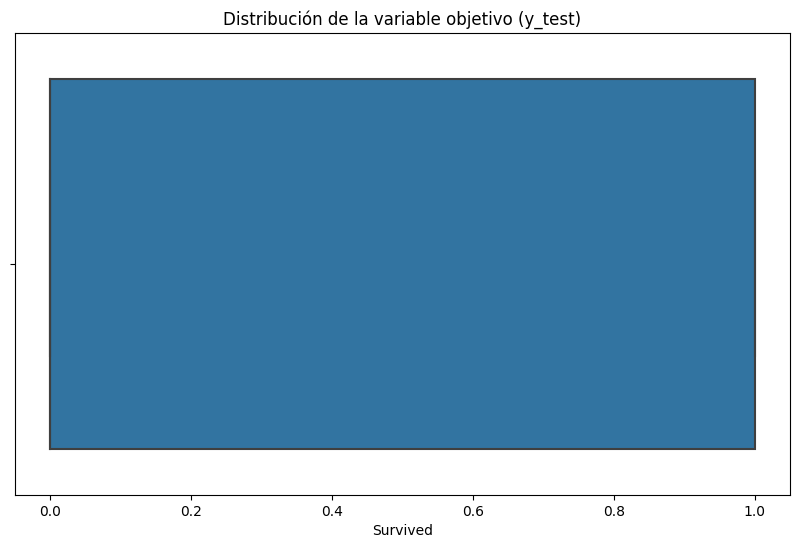

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar si existen outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test)
plt.title('Distribución de la variable objetivo (y_test)')
plt.show()


Si encuentras valores atípicos, puedes eliminarlos o aplicar transformaciones (como logaritmos) para reducir su impacto.
2. Escalar los datos:

Escalar los datos es una forma de evitar que las diferencias en las escalas entre las características afecten el entrenamiento del modelo. Puedes usar StandardScaler o MinMaxScaler de Scikit-learn para normalizar los datos antes de entrenar el modelo.

3. Revisar el modelo:

    Entrenar otros modelos: Si el modelo de Random Forest sigue teniendo un MAPE tan alto, intenta utilizar otros modelos como XGBoost o Gradient Boosting, que son más robustos para ciertos problemas.
    Ajuste de hiperparámetros: Usa técnicas como GridSearchCV o RandomizedSearchCV para encontrar los mejores hiperparámetros y evitar sobreajuste o subajuste.

4. Revisar la variable objetivo:

Si el objetivo de tu modelo (en este caso, la variable Survived) tiene una distribución desequilibrada (por ejemplo, solo un 20% de los pasajeros sobrevivieron), podrías considerar usar métricas específicas para clasificación como accuracy, AUC, etc., si es un problema de clasificación, en lugar de MAPE.
5. Transformar las predicciones o usar métricas alternativas:

Si el modelo sigue generando valores anómalos, puedes intentar usar una métrica alternativa como MAE (Mean Absolute Error) o RMSE (Root Mean Squared Error), que no tienden a amplificar el error tanto como el MAPE.
Código para probar otras métricas:

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


MAE: 0.25
RMSE: 0.37


Si el modelo es de clasificación (como en Titanic):

Si estás trabajando con un modelo de clasificación y no con regresión, el MAPE no es la métrica adecuada. En su lugar, utiliza accuracy, AUC, F1-score o precision para evaluar el modelo de clasificación.

In [35]:
from sklearn.metrics import accuracy_score, classification_report

# Calcular accuracy para clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generar reporte de clasificación
print(classification_report(y_test, y_pred))


ValueError: Classification metrics can't handle a mix of binary and continuous targets

El error ValueError: Classification metrics can't handle a mix of binary and continuous targets sugiere que las predicciones generadas por tu modelo (en y_pred) no están en el formato adecuado para un problema de clasificación. Es probable que el modelo esté generando valores continuos en lugar de valores binarios (0 o 1), lo cual es esperado para un modelo de clasificación binaria (como el caso de Titanic).
¿Por qué ocurre este error?

Cuando se utiliza un modelo de clasificación (como un Random Forest), el método predict() devuelve predicciones discretas (en este caso, valores 0 o 1). Sin embargo, algunos modelos como RandomForestRegressor o el método predict_proba() en un modelo de clasificación, devuelven probabilidades continuas, no las clases directamente.
Solución:

    Si estás usando predict(), asegúrate de que el modelo sea de clasificación.
    Si obtienes probabilidades (como con predict_proba()), deberás convertirlas en clases discretas (0 o 1) antes de calcular métricas como accuracy, precision, etc.

Solución 1: Usar predict() en lugar de predict_proba():

Si el modelo que estás utilizando es un modelo de clasificación, asegúrate de usar predict(), no predict_proba(). predict() devuelve las predicciones de clase, mientras que predict_proba() devuelve las probabilidades.

In [37]:
# Usar predict_proba y convertir a clases binarias
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (1)
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Convertir las probabilidades a 0 o 1

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")


AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

De nuevo, el problema es de clasificación y estábamos usando un RandomRorestRegresor

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cambiar a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Usar predict() para obtener las predicciones de clase
y_pred_class = model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.12%


Conclusión:

    Revisa y limpia los datos (especialmente los outliers).
    Escala las características para que todas estén en una escala similar.
    Si es un problema de clasificación, cambia la métrica y usa métricas como accuracy o F1-score.
    Si el problema persiste, ajusta los hiperparámetros o prueba otros modelos como XGBoost.

Interpretación:

    Si el MAPE es, por ejemplo, 15%, esto significa que el modelo, en promedio, se equivoca un 15% en sus predicciones.
    Un MAPE muy bajo (por ejemplo, 5%) sugiere que las predicciones son muy precisas en relación con los valores reales.
    Un MAPE alto (por ejemplo, 50%) indica que el modelo tiene un rendimiento deficiente.

Conclusión:

    Feature Importance te ayuda a entender qué variables son más influyentes en el modelo, lo que te permite interpretar el comportamiento del árbol de decisión.
    MAPE es útil para evaluar el rendimiento de un modelo de regresión, mostrando qué tan cerca están las predicciones de los valores reales en términos porcentuales.